# Sandbox for QRN-RL-GNN

This is an IPython notebook to be used for the following:

1) As a sandbox to test snippets of code during development

2) For demonstration purposes of functionalities

### Imports

In [73]:
import numpy as np
import torch 
from tqdm import tqdm
import matplotlib.pyplot as plt
from repeaters import RepeaterNetwork
from models import CNN, GNN
from gnn_env import Environment

## Testing

## New code with cutoffs please

In [74]:
model = GNN(node_dim        = 1, # always
            embedding_dim   = 16,
            num_layers      = 3,
            num_heads       = 4,
            hidden_dim      = 64, 
            unembedding_dim = 16, 
            output_dim      = 4, # always
            ) 

In [75]:
env = Environment(model)
# env.preview()

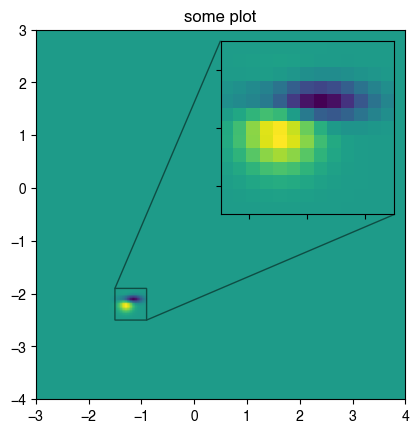

In [76]:
"""Use inset_zoom later to better probe regions of interest during training"""
from matplotlib import cbook
fig, ax = plt.subplots()

# make data
z = cbook.get_sample_data("axes_grid/bivariate_normal.npy")  # 15x15 array
z2 = np.zeros((150, 150))
ny, nx = z.shape
z2[30:30+ny, 30:30+nx] = z
extent = (-3, 4, -4, 3)

ax.imshow(z2, extent=extent, origin="lower")

# inset Axes....
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.5, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.imshow(z2, extent=extent, origin="lower")

ax.indicate_inset_zoom(axins, edgecolor="black")
ax.set_title('some plot')
plt.show()

## Basic usage

### Basic usage 1: The Quantum repeaters

First lets initialize the network this is done with the `RepeaterNetwork` class. It is parametrized by the number of nodes $n$, the system parameters $\tau, p_e, p_s$ and some other stuff

In [77]:
net = RepeaterNetwork(
                    n=4,
                    p_entangle = 1,
                    p_swap = 1,
                    tau = 1_000,
                    kappa = 1,
                    directed = False,
                    geometry = 'chain',
                    )

The state can be seen anytime with ```self.matrix``` (dictionary) or used gor GNNs with ```self.tensorState()``` (pyG.data). For the first case the state is returned in a dictionary of the form $\texttt{self.matrix} = \big\{(i,j) : [\text{adj}, \text{ent}]\big\}$ where $i,j$ denote the vertices (repeaters) of the edge (links), adj denotes the adjecency (0,1) and ent the links.

In [78]:
net.matrix

{(0, 1): [1, 0.0],
 (1, 2): [1, 0.0],
 (0, 3): [0.0, 0.0],
 (2, 3): [1, 0.0],
 (0, 2): [0.0, 0.0],
 (1, 3): [0.0, 0.0]}

In [79]:
# internal variable controls end-to-end
net.global_state

False

### Operation 1: Entanglement

In [80]:
def look_for_entanglement(edge):
    print(f'Entanglement at {edge}: {net.getLink(edge=(0,1), linkType = 1)}')

In [81]:
edge = (0,1)
look_for_entanglement(edge=edge)
net.entangle(edge = (0,1))
look_for_entanglement(edge=edge)

Entanglement at (0, 1): 0.0
Entanglement at (0, 1): 1


In [82]:
#now lets reset
net.resetState()
net.matrix

{(0, 1): [1, 0],
 (1, 2): [1, 0],
 (0, 3): [0.0, 0],
 (2, 3): [1, 0],
 (0, 2): [0.0, 0],
 (1, 3): [0.0, 0]}

### Operation 2: Swap

In [83]:
#two entanglements and a swap give an extended link
print(f' Initial entanglement :{net.matrix[(0,2)][1]}')
net.entangle(edge=(0,1))
net.entangle(edge=(1,2))
net.swapAT(1)
print(f' Final entanglement :{net.matrix[(0,2)][1]}')
net.resetState()

 Initial entanglement :0
 Final entanglement :0.9995002499166875


In [85]:
# can also be done with an edge specific swap function
print(f' Initial entanglement :{net.matrix[(0,2)][1]}')
net.entangle(edge=(0,1))
net.entangle(edge=(1,2))
net.swap(edge1=(0,1), edge2=(1,2))
print(f' Final entanglement :{net.matrix[(0,2)][1]}')
net.resetState()

 Initial entanglement :0
 Final entanglement :0.0
